<a href="https://colab.research.google.com/github/RodrigoAB93/Trabalho_AM_Nao_Supervisionado/blob/main/Trabalho_Aprendizado_de_maquina_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#---------------------------------------------------------------------------------------------# 
### Trabalho desenvolvido para disciplina Aprendizado de Maquina não supervisionada. 
### Desenvolvido por: 
### Rodrigo Almeida Bezerra 
### rodrigobezerra@ufba.br  
### Professor:  Ricardo Araujo Rios  
### Fonte:https://www.kaggle.com/datasets/derrickmwiti/google-2019-cluster-sample
#---------------------------------------------------------------------------------------------# 

In [ ]:
#Importando bibliotecas necessárias. 
# DataFrame 
import pandas as pd 


# Matplot
import matplotlib.pyplot as plt
import matplotlib as mpl

# Scikit-learn
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, jaccard_score
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler 


# Helper Libraries 
import numpy as np 
import seaborn as sns  

 





In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mestrado/TrabalhoInteligenciaComputacional/GoogleCluster2019.csv',sep=',') 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.000000,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.000000,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.000000,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.000000,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.000000,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405889,405889,0,2,299950285958,1,0,117,0,1341,10625460233,...,0.002117,0.000048,0.693324,0.003158,1.000000,[0.00022793 0.00822449 0.00866699 0.01246643 0...,[0.0222168 0.02261353 0.02294922 0.02404785 0...,8,FAIL,1
405890,405890,18279167039,0,330587213089,2,0,360,330587120885,898,68669881389,...,0.000000,0.002468,1.019433,0.001859,1.000000,[0.01028442 0.02087402 0.02432251 0.02661133 0...,[0.05828857 0.05871582 0.05938721 0.06097412 0...,1,ENABLE,0
405891,405891,733307641549,3,13748637767,3,0,200,13748635759,1959,126641993288,...,0.000000,0.000480,0.990970,0.002941,1.000000,[0.00857544 0.01472473 0.01660156 0.01873779 0...,[0.03515625 0.03552246 0.03729248 0.03912354 0...,2,FINISH,0
405892,405892,1984523129238,2,323372663325,1,0,117,0,6452,191941429308,...,0.001562,0.000229,3.023431,0.015743,0.996667,[0.00024414 0.00030136 0.00036907 0.00073719 0...,[0.00904846 0.00907898 0.00909424 0.00912476 0...,8,FAIL,1


In [ ]:
#Substitui onde tiver NaN por 0
data = data.fillna(0)

In [ ]:
#Trabalhando somente com uma amostra
data = data.sample(1000) 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
279286,279286,1543084381717,2,285748470971,0,0,0,0,2333,22083386386,...,0.002136,0.000040,1.331382,0.016535,0.996667,[0.00026512 0.0063324 0.00692749 0.00721741 0...,[0.00996399 0.01008606 0.01017761 0.01026917 0...,7,FAIL,1
126365,126365,868427039577,3,796037227562,0,0,0,0,17163,19504162317,...,0.000000,0.000000,0.000000,0.000000,1.000000,[],[],4,FINISH,0
61077,61077,2426761679381,5,399280620994,1,0,103,0,94,92053041195,...,0.001673,0.000593,0.000000,0.000000,1.000000,[],[],1,LOST,0
350947,350947,1985037519616,0,496921116211,0,0,0,0,56145,92573463,...,0.003613,0.000000,0.000000,0.000000,1.000000,[1.14440918e-05 1.14440918e-05 1.14440918e-05 ...,[1.14440918e-05 1.14440918e-05 1.14440918e-05 ...,2,ENABLE,0
264170,264170,723622816016,1,346556401280,1,0,103,0,13005,8902045,...,0.010422,0.000003,0.998315,0.002872,1.000000,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00190163 0.00190163 0.00190163 0.00190163 0...,6,EVICT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20001,20001,236665147167,5,457357020339,0,0,103,0,2006,16586701930,...,0.006615,0.000851,2.310644,0.011319,1.000000,[0.0002203 0.00024986 0.0002718 0.00028706 0...,[0.0022316 0.00246048 0.00331879 0.00365067 0...,2,LOST,0
28994,28994,230974166263,3,25911621841,2,0,0,0,4046,3374595517,...,0.000272,0.000010,0.000000,0.000000,1.000000,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0
224772,224772,992505385120,3,796037227562,0,0,0,0,3214,19506277256,...,0.000000,0.000000,0.000000,0.000000,1.000000,[],[],4,FINISH,0
160280,160280,1402990072214,0,122697038507,1,0,200,0,5012,265399051,...,0.005211,0.000154,1.497791,0.004510,1.000000,[0.0002861 0.00031853 0.00033569 0.00035667 0...,[0.01014709 0.01045227 0.01268005 0.01290894 0...,4,ENABLE,0


In [ ]:
data.head(10) 

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
129467,129467,1658974192377,5,784488673642,1,0,105,0,12552,1129019728,...,0.011017,0.000008,3.684666,0.017217,1.000000,[0.00010395 0.00014496 0.00016403 0.00018024 0...,[0.00030327 0.00031376 0.00032997 0.00034714 0...,4,LOST,0
121869,121869,2024002240768,2,359664329131,1,0,103,0,906,13160364958,...,0.025330,0.000007,3.149869,0.021253,1.000000,[0.00027561 0.00035191 0.00037575 0.00039864 0...,[0.00078201 0.00080872 0.00083065 0.0008688 0...,6,FAIL,1
12488,12488,1048295569689,5,738552572930,2,0,360,640849217519,676,741372001,...,0.000000,0.001432,1.057644,0.008185,1.000000,[0.00018311 0.00019836 0.00021458 0.00023746 0...,[0.00064754 0.00111771 0.00343704 0.00368881 0...,3,LOST,0
281507,281507,660715378871,6,737592861432,3,1,200,0,57,145097145082,...,0.002136,0.000276,0.000000,0.000000,1.000000,[0.00012875 0.00014496 0.00015926 0.00017357 0...,[0.01605225 0.01608276 0.0161438 0.01617432 0...,3,SCHEDULE,0
66660,66660,2209449035768,3,81683188857,1,0,103,0,52,21833523,...,0.020416,0.000096,2.706172,0.013722,0.994975,[0.00419617 0.00646973 0.00710297 0.00752258 0...,[0.00892639 0.00895691 0.00898743 0.00901794 0...,1,FINISH,0
356316,356316,156601232857,3,315267882680,0,0,0,0,4097,5775558433,...,0.001017,0.000019,2.086704,0.018998,1.000000,[0.00039482 0.00062656 0.00080776 0.00106239 0...,[0.00278854 0.00287628 0.00295258 0.00297928 0...,6,FINISH,0
42258,42258,61491112646,3,261561487633,2,1,101,0,645,270678067250,...,0.028748,0.001131,0.000000,0.000000,1.000000,[5.14984131e-05 2.35557556e-04 4.27246094e-04 ...,[0.01464844 0.01475525 0.01487732 0.01499939 0...,8,FINISH,0
350237,350237,320827485041,0,374675853022,1,0,105,0,7166,1377899667,...,0.005730,0.000361,4.731277,0.017076,0.996667,[0.00018597 0.00020313 0.0002203 0.0002327 0...,[0.00051498 0.00051975 0.00052452 0.00053024 0...,1,ENABLE,0
263828,263828,1664073639846,5,784488673642,1,0,105,0,4124,5561707155,...,0.011017,0.000008,3.684666,0.017217,1.000000,[0.00010395 0.00014496 0.00016403 0.00018024 0...,[0.00030327 0.00031376 0.00032997 0.00034714 0...,4,LOST,0
172890,172890,128188122112,2,781075802527,2,0,360,698302729378,989,5561768458,...,0.000000,0.000051,1.529382,0.004321,1.000000,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[1.90734863e-06 1.90734863e-06 1.90734863e-06 ...,4,FAIL,1


In [ ]:
#Eliminando colunas desnecessarias 
data = data.drop(columns=['Unnamed: 0','time', 'instance_events_type', 'resource_request', 'average_usage','cpu_usage_distribution', 'tail_cpu_usage_distribution','collection_id','scheduling_class', 'collection_type', 'priority','alloc_collection_id', 'instance_index', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name','start_after_collection_ids', 'vertical_scaling', 'scheduler','start_time', 'end_time', 'maximum_usage','random_sample_usage', 'assigned_memory', 'page_cache_memory', 'memory_accesses_per_instruction'])

In [ ]:
data.columns 

Index(['machine_id', 'cycles_per_instruction', 'sample_rate', 'cluster',
       'event', 'failed'],
      dtype='object')

In [ ]:
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event,failed
279286,22083386386,1.331382,0.996667,7,FAIL,1
126365,19504162317,0.000000,1.000000,4,FINISH,0
61077,92053041195,0.000000,1.000000,1,LOST,0
350947,92573463,0.000000,1.000000,2,ENABLE,0
264170,8902045,0.998315,1.000000,6,EVICT,0
...,...,...,...,...,...,...
20001,16586701930,2.310644,1.000000,2,LOST,0
28994,3374595517,0.000000,1.000000,2,FINISH,0
224772,19506277256,0.000000,1.000000,4,FINISH,0
160280,265399051,1.497791,1.000000,4,ENABLE,0


In [ ]:
#LOST = 0 
#FAIL = 1 
#FINISH = 2  
#SCHEDULE = 3 
#ENABLE = 4  
#EVICT = 5 
#KILL = 6 
#UPDATE_PENDING = 7
data = data.replace('LOST',0).replace('FAIL',1).replace('FINISH',2).replace('SCHEDULE',3).replace('ENABLE',4).replace('EVICT',5).replace('KILL',6).replace('UPDATE_PENDING',7)  
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event,failed
0,168846390496,NaN,1.000000,7,1,1
1,85515092,NaN,1.000000,7,1,1
2,169321752432,0.939919,1.000000,7,3,0
3,178294817221,1.359102,1.000000,8,1,1
4,231364893292,NaN,1.000000,2,2,0
...,...,...,...,...,...,...
405889,10625460233,0.693324,1.000000,8,1,1
405890,68669881389,1.019433,1.000000,1,4,0
405891,126641993288,0.990970,1.000000,2,2,0
405892,191941429308,3.023431,0.996667,8,1,1


In [ ]:
print(data.shape) 


(1000, 9)


Gráfico Histograma

In [ ]:
fig = px.histogram(data, x="machine_id",y="cluster")
fig.show()



Grafico de Disperção multivariado

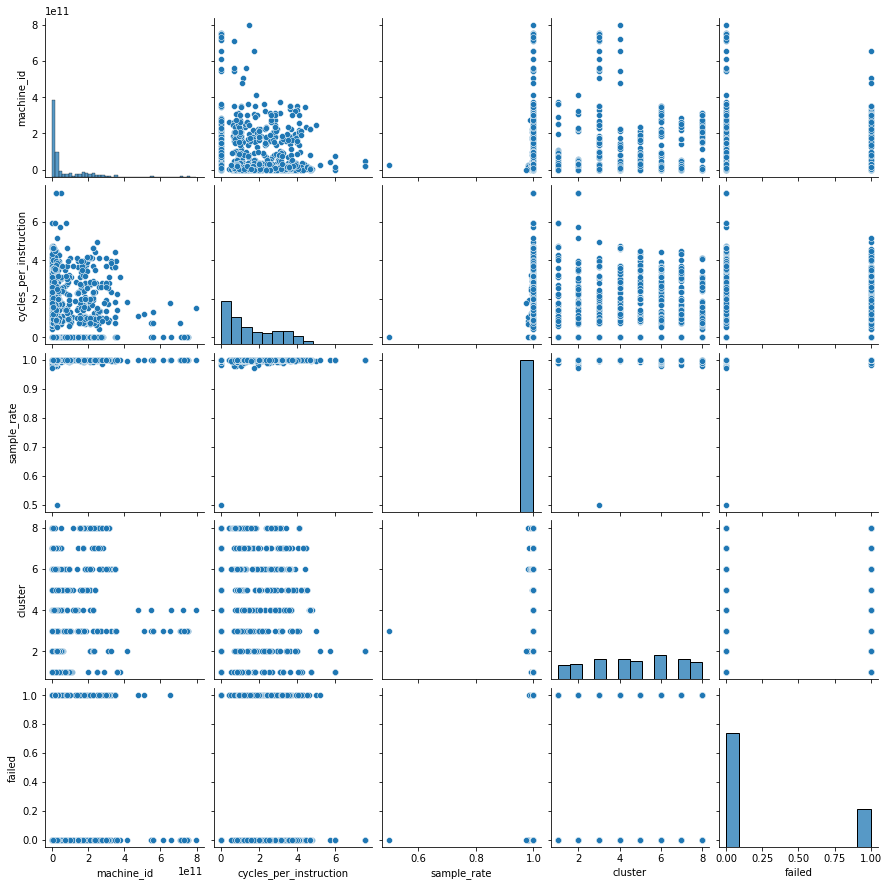

In [ ]:
sns.pairplot(data)  

Gráficos Box plot


In [ ]:
fig = px.box(data, x="event",y="cluster")
fig.show()

GRÁFICO HISTOGRAMA EMPILHADO

<Figure size 432x288 with 0 Axes>

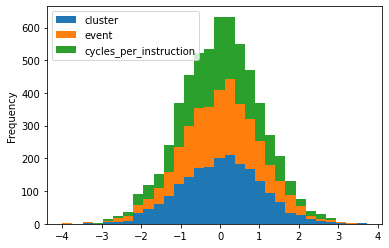

In [ ]:
# HISTOGRAMA EMPILHADO
data_hist = pd.DataFrame(
      {
         "cluster": np.random.randn(2000) ,
         "event": np.random.randn(2000),
         "cycles_per_instruction": np.random.randn(2000),
       },
  columns=["cluster", "event","cycles_per_instruction"],
   ).astype(float);
plt.figure();
data_hist.plot.hist(stacked=True, bins=30);

Gráfico Boxplot

In [ ]:
scatterplot1 = px.scatter(data, x="machine_id",y="cluster")
scatterplot1.show()

Matriz de Correlação


In [ ]:
corr = data.iloc[:,0:].corr()
corr

,machine_id,cycles_per_instruction,sample_rate,cluster,failed
machine_id,1.000000,-0.077809,0.016079,-0.010493,-0.022387
cycles_per_instruction,-0.077809,1.000000,0.033875,0.054064,0.128338
sample_rate,0.016079,0.033875,1.000000,0.026921,0.012960
cluster,-0.010493,0.054064,0.026921,1.000000,0.041781
failed,-0.022387,0.128338,0.012960,0.041781,1.000000


Kmeans


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=123456)# random_state= semente aleatoria
clustering = kmeans.fit_predict(data) 
clustering

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette avg:", silhouette_avg)

Silhouette avg: 0.8209727444818344


In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'average')
clustering = clustering.fit_predict(data)

In [ ]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette avg:", silhouette_avg)

Silhouette avg: 0.8202916146541517


DBSCAN

In [ ]:
X_train = data[['machine_id', 'cycles_per_instruction','cluster','event']]

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


ValueError: ignored

In [ ]:
# Number of clusters in labels, ignoring noise if present.
clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)

print("Estimated number of clusters: ",clusters)
print("Estimated number of noise points: ", noise)


Estimated number of clusters:  0
Estimated number of noise points:  1000


ValueError: ignored